In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
df = pd.read_csv("FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding = "latin-1")
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [5]:
#What is the total Protein supply quantity in Madagascar in 2015?

mada_protein_2015 = df[(df['Area'] == 'Madagascar') & (df['Element'] == 'Protein supply quantity (g/capita/day)')]

overall_protein_2015 = mada_protein_2015['Y2015'].sum()
overall_protein_2015

173.04999999999998

In [7]:
#Perform a groupby operation on ‘Element’.  What year has the highest sum of Stock Variation?

element_stock_years = df[df['Element'] == 'Stock Variation'].groupby('Element')[['Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']].sum()

stock_varia = element_stock_years.sum(axis=0).idxmax()

stock_varia

'Y2014'

In [8]:
#What is the total number and percentage of missing data in 2014 to 3 decimal places?

df.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [9]:
df.shape

(60943, 12)

In [16]:
#Missing_values for Y2014 = 1589
#Getting the percentage of missing data

percentage_missing = (1589 / 60943) * 100

print(round(percentage_missing, 3))

2.607


In [17]:
#What is the mean and standard deviation across the whole dataset for the year 2017 to 2 decimal places?

data_2017 = df['Y2017']

mean_for_2017 = data_2017.mean()
std_for_2017 = data_2017.std()

print(round(mean_for_2017, 2))
print(round(std_for_2017, 2))

140.92
1671.86


In [19]:
#Perform a groupby operation on ‘Element’.  What is the total number of the sum of Processing in 2017?

element_processing = df.groupby('Element').get_group('Processing')

processing_sum_for_2017 = element_processing['Y2017'].sum()

processing_sum_for_2017

292836.0

In [20]:
#Select columns ‘Y2017’ and ‘Area’, Perform a groupby operation on ‘Area’.  Which of these Areas had the highest sum in 2017?

data_year_area = df[['Y2017', 'Area']]

sum = data_year_area.groupby('Area')['Y2017'].sum()

max_area_2017 = sum.idxmax()

max_area_2017

'Nigeria'

In [21]:
#What is the total number of unique countries in the dataset?

unique_countries = df['Area'].nunique()

unique_countries

49

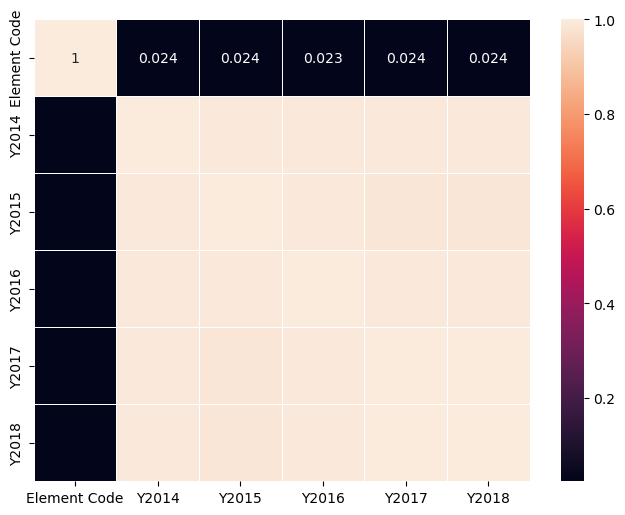

In [22]:
#Which year had the least correlation with ‘Element Code’?

data = ['Element Code', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']
df1 = df[data]

corre = df1.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corre, annot=True, linewidths=0.5)
plt.show();

In [26]:
corre_element_code = df1.corr().loc['Element Code'][1:]

year_lowest_correlation = corre_element_code.idxmin()
year_lowest_correlation

'Y2016'

In [30]:
#What is the total sum of Wine produced in 2015 and 2018 respectively?

#Perform a groupby sum aggregation on ‘Item’

data1 = df[(df['Item'] == 'Wine') & (df['Element'] == 'Production')][['Item', 'Y2015', 'Y2018']]

wine_2015 = data1.groupby('Item')['Y2015'].sum()['Wine']
wine_2018 = data1.groupby('Item')['Y2018'].sum()['Wine']
print("wine_2015 is ", wine_2015)
print("wine_2018 is ", wine_2018)

wine_2015 is  1213.0
wine_2018 is  1091.0


In [37]:
#Select columns ‘Y2017’ and ‘Area’, Perform a groupby operation on ‘Area’.  Which of these Areas had the 7th lowest sum in 2017?

data2 = df[['Y2017', 'Area']]

sum_2017 = data2.groupby('Area')['Y2017'].sum()

sum_2017

Area
Algeria                         325644.27
Angola                          229159.57
Benin                           124771.22
Botswana                         22101.30
Burkina Faso                    101855.07
Cabo Verde                       14650.74
Cameroon                        232030.43
Central African Republic         29937.00
Chad                             71594.68
Comoros                             59.84
Congo                            41181.68
Côte d'Ivoire                   224599.01
Djibouti                         22729.91
Egypt                           866379.92
Eswatini                         54343.33
Ethiopia                        448683.76
Ethiopia PDR                         0.00
Gabon                            27979.64
Gambia                           23154.18
Ghana                           337599.06
Guinea                           98138.87
Guinea-Bissau                    19102.77
Kenya                           264660.66
Lesotho                      